Analisis casos manuales

In [ ]:
import sys
import os
import pandas as pd
from datetime import datetime,timedelta
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

username = os.getlogin()
hoy = datetime.now()
ayer = (datetime.now() - timedelta(days=1))
fecha_actual = hoy.strftime("%d.%m.%Y")
formatofecha = hoy.strftime("%Y-%m-%d")
formatofinal = hoy.strftime("%d-%m-%Y")
df1 = pd.DataFrame
df1 = pd.read_excel('C:\\Users\\' + username + '\\Documents\\Py\\CASOS\\tablacasosmanuales.xlsx',
                    sheet_name='Sheet1',header=0,
                    names=['caso','agencia','tdep','contacto','estado','asunto','cierre','montocierre','depositado','banco','creadopor','fapertura','fmodificacion','alias','aliasum'])

df1.fillna('null', inplace=True)
# print(df1['fmodificacion'].dtype)
# print(hoy)
# print(ayer)
print("Tabla cargada.")

Tabla cargada.


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_21112\2944800385.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('null', inplace=True)


Obtener la ocurrencia de tipo de caso

Reemplazar tipo de caso y periodicidad

In [1]:
dfp = df1.copy()
dfp = dfp[~dfp['tdep'].str.startswith('Problema cartola')]
periodicity = dfp[dfp['aliasum'].str.contains('procom')].groupby(dfp['fapertura'].dt.to_period('D'))['caso'].count()
periodicitypc = df1[df1['tdep'].str.contains('Problema cartola')].groupby(df1['fapertura'].dt.to_period('D'))['caso'].count()
dfr = periodicity.resample('m').sum()
dfpc = periodicitypc.resample('m').sum()
# dfr.sort_values('fapertura',ascending=True)
print(dfr)
# print(count)
# print(count.mean())

NameError: name 'df1' is not defined

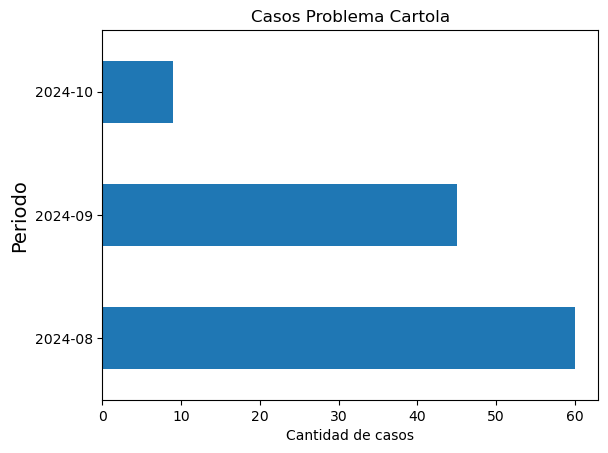

In [4]:
dfpc.plot(kind='barh',x='count')
plt.title('Casos Problema Cartola')
plt.xlabel('Cantidad de casos')
plt.ylabel('Periodo', fontsize = 14)
plt.show()

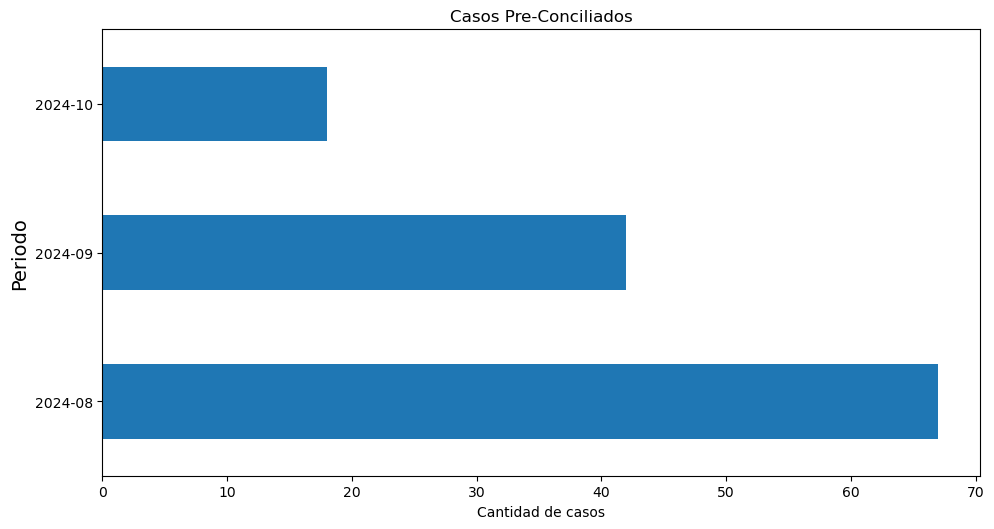

In [5]:
dfr.plot(kind='barh',y='count',figsize= (10,5))

plt.tight_layout()
plt.title('Casos Pre-Conciliados')
plt.xlabel('Cantidad de casos')
plt.ylabel('Periodo', fontsize = 14)
plt.show()